# Task
Generate 10 examples of user complaints for enterprise software systems, including labels for affected component and severity, by leveraging OpenAI to create enterprise software systems, industries, workflow architectures, and descriptions of malfunctions and user complaints.

## Load OpenAI API Key

### Subtask:
Load the OpenAI API key from notebook secrets, ensuring secure access to the OpenAI API.


**Reasoning**:
To securely load the OpenAI API key, I will import the `userdata` module and retrieve the API key from notebook secrets.



In [72]:
import os

openai_api_key = os.getenv("OPENAI_API_KEY")

In [73]:
import subprocess
import time

# 1. Install Ollama and the PCI utils for GPU detection
print("Installing Ollama...")
!curl -fsSL https://ollama.com/install.sh | sh
!sudo apt-get install -y pciutils

# 2. Start the Ollama server in the background
print("Starting Ollama server...")
process = subprocess.Popen(["ollama", "serve"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# 3. Wait a few seconds for the server to spin up
time.sleep(5)
print("Ollama server is running!")

Installing Ollama...
>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pciutils is already the newest version (1:3.7.0-6).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
Starting Ollama server...
Ollama server is running!


In [74]:
#!pip install ollama
import ollama

# This will download the model. It may take a few minutes
# depending on your internet speed (approx 4.7GB)
print("Downloading llama3...")
ollama.pull('llama3.2')
print("Download complete!")

Download complete!


## Generate Enterprise Software Systems

### Subtask:
Use OpenAI to generate a list of 10 enterprise software systems (e.g., ERP, CRM). The output will be a JSON array with keys 'system' and 'description', which will then be saved to disk.


**Reasoning**:
To generate enterprise software systems using OpenAI, I need to import the OpenAI client, initialize it with the API key, create a detailed prompt for generating a JSON array of systems and descriptions, and then call the OpenAI Chat Completions API, ensuring the response is formatted as JSON. These are the initial steps to interact with the OpenAI API for the subtask.



In [ ]:
from openai import OpenAI
import json

# Initialize the OpenAI client
client = OpenAI(api_key="XXXXXXXXXX"
)

# Create a prompt for generating enterprise software systems
prompt_text = """Generate a list of 10 types of enterprise software systems as a simple JSON array. Each element should have a 'system' name and a 'description'.
Top level element in JSON output should be 'systems'
Example format:
[
  {
    "system": "ERP System",
    "description": "A comprehensive suite for managing core business processes."
  },
  {
    "system": "CRM",
    "description": "A customeer relation managmenet system"
  }
]
"""

# Call the OpenAI Chat Completions API
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant designed to output JSON."
        },
        {
            "role": "user",
            "content": prompt_text,
        }
    ],
    model="gpt-3.5-turbo-1106", # Using a model known to be good at JSON output
    response_format={ "type": "json_object" }
)

# Parse the JSON response
response_content = chat_completion.choices[0].message.content
enterprise_systems = json.loads(response_content)

print("Generated enterprise systems from OpenAI API.",enterprise_systems)

Generated enterprise systems from OpenAI API. {'systems': [{'system': 'ERP System', 'description': 'A comprehensive suite for managing core business processes.'}, {'system': 'CRM', 'description': 'Customer Relationship Management system for managing customer interactions and data.'}, {'system': 'HRMS', 'description': 'Human Resource Management System for managing employee data and processes.'}, {'system': 'SCM', 'description': 'Supply Chain Management system for managing the flow of goods and services.'}, {'system': 'BI', 'description': 'Business Intelligence system for analyzing and reporting on business data.'}, {'system': 'DMS', 'description': 'Document Management System for organizing and managing documents.'}, {'system': 'CMS', 'description': 'Content Management System for managing digital content and websites.'}, {'system': 'EAM', 'description': 'Enterprise Asset Management system for tracking and managing physical assets.'}, {'system': 'PLM', 'description': 'Product Lifecycle Ma

**Reasoning**:
The previous step successfully generated a list of enterprise software systems and stored it in the `enterprise_systems` variable. The next instruction is to save this data as a JSON file to disk.



In [76]:
import json

# Save the generated list of enterprise software systems as a JSON file
with open('enterprise_systems.json', 'w') as f:
    json.dump(enterprise_systems, f, indent=2)

print("Enterprise systems saved to 'enterprise_systems.json'.")

Enterprise systems saved to 'enterprise_systems.json'.


## Generate Industries

### Subtask:
Use OpenAI to generate a list of 10 industries (e.g., manufacturing, banking, entertainment). The output will be a JSON array with keys 'industry' and 'description', which will then be saved to disk.


**Reasoning**:
To generate industries using OpenAI, I will create a detailed prompt, call the OpenAI API with the specified model and JSON response format, and then parse the JSON output to store the generated industries.



In [77]:
import json

# Create a prompt for generating industries
prompt_text_industries = """Generate a list of 10 industries. Each industry should have an 'industry' name and a 'description'. The output should be a JSON object containing a 'industries' key, which is a JSON array of objects, where each object has 'industry' and 'description' as keys.
top level element in josn should be industries
Example format:
{
  "industries": [
    {
      "industry": "Financial Services",
      "description": "Sector dealing with money management, including banks, credit unions, and investment firms."
    }
  ]
}
"""

# Call the OpenAI Chat Completions API
chat_completion_industries = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant designed to output JSON."
        },
        {
            "role": "user",
            "content": prompt_text_industries,
        }
    ],
    model="gpt-3.5-turbo-1106", # Using a model known to be good at JSON output
    response_format={ "type": "json_object" }
)

# Parse the JSON response
response_content_industries = chat_completion_industries.choices[0].message.content
industries = json.loads(response_content_industries)

print("Generated industries from OpenAI API.",industries)

Generated industries from OpenAI API. {'industries': [{'industry': 'Information Technology', 'description': 'Industry dealing with the use of computers, networks, and software to create, process, store, and exchange electronic data and information.'}, {'industry': 'Healthcare', 'description': 'Sector encompassing the maintenance or improvement of health through the prevention, diagnosis, treatment, and recovery of illness, disease, injury, and other physical and mental impairments.'}, {'industry': 'Automotive', 'description': 'Industry involving the design, development, manufacturing, marketing, and selling of motor vehicles.'}, {'industry': 'Retail', 'description': 'Sector encompassing the sale of goods to consumers through various channels such as brick-and-mortar stores, e-commerce, and mobile commerce.'}, {'industry': 'Hospitality', 'description': 'Industry focused on providing accommodation, food, and beverage services to travelers and tourists.'}, {'industry': 'Energy', 'descript

**Reasoning**:
The previous step successfully generated a list of industries and stored it in the `industries` variable. The next instruction is to save this data as a JSON file to disk.



In [78]:
import json

# Save the generated list of industries as a JSON file
with open('industries.json', 'w') as f:
    json.dump(industries, f, indent=2)

print("Industries saved to 'industries.json'.")

Industries saved to 'industries.json'.


## Define Workflow Generation Function

### Subtask:
Create a Python function that takes dictionaries of systems and industries. It will randomly select one system and one industry, then use OpenAI to generate a   workflow/architecture description for them.


**Reasoning**:
To define the `generate_workflow` function, I need to import the `random` module for random selection, then implement the function as described, including selecting a random system and industry, constructing an OpenAI prompt, calling the OpenAI API for a   workflow description, parsing the JSON response, and returning the results.



In [79]:
import random
from openai import OpenAI # client is already initialized, but for standalone clarity
import json

def generate_workflow(enterprise_systems: dict, industries: dict, client: OpenAI) -> tuple:
    """
    Generates a workflow that uses technical sub-systems and components for a randomly selected enterprise system and industry
    using the OpenAI API.

    Args:
        enterprise_systems (dict): A dictionary containing a list of enterprise systems.
        industries (dict): A dictionary containing a list of industries.
        client (OpenAI): An initialized OpenAI client.

    Returns:
        tuple: A tuple containing the parsed workflow description (dict),
               the selected enterprise system (dict), and the selected industry (dict).
    """
    # Randomly select one system and one industry
    selected_system = random.choice(enterprise_systems['systems'])
    selected_industry = random.choice(industries['industries'])

    system_name = selected_system['system']
    system_description = selected_system['description']
    industry_name = selected_industry['industry']
    industry_description = selected_industry['description']

    # Construct a detailed prompt for OpenAI
    prompt_text = f"""Generate a concise workflow or architecture description with technical sub-systems and components for the enterprise software system '{system_name}' operating within the '{industry_name}' industry. The description should be relevant to the system's purpose: '{system_description}' and the industry context: '{industry_description}'.

    Focus on typical processes or interactions that would involve this system in this industry.

    The output should be a JSON object with the following keys:
    - 'workflow_name': A descriptive name for the workflow (e.g., 'Order Fulfillment Process in Retail with ERP').
    - 'workflow_description': A brief narrative description of the workflow.
    - 'workflow_components': A JSON array of key technical components involved (e.g., HRM Workflow Engine, Employee Data Store, Payroll Processing Module, Attendance Tracking System). List at least 5 components.

    Example format:
    {{
      "workflow_name": "Employee Lifecycle Management",
      "workflow_description": "This workflow manages the complete lifecycle of employees within an educational institution, from onboarding to payroll and attendance tracking. It ensures employee data consistency, accurate compensation, and regulatory compliance through integrated HR systems.",
      "workflow_components": [
        "HRM Workflow Engine",
        "Employee Data Store",
        "Payroll Processing Module",
        "Attendance Tracking System"
      ]
    }}
    """

    # Call the OpenAI Chat Completions API
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant designed to output JSON. Provide a relevant consice and technical workflow description."
            },
            {
                "role": "user",
                "content": prompt_text,
            }
        ],
        model="gpt-3.5-turbo-1106", # Using a model known to be good at JSON output
        response_format={ "type": "json_object" }
    )

    # Parse the JSON response
    response_content = chat_completion.choices[0].message.content
    workflow_description = json.loads(response_content)

    print(f"Generated workflow for {system_name} in {industry_name}.")
    return workflow_description, selected_system, selected_industry

print("Defined the 'generate_workflow' function.")

Defined the 'generate_workflow' function.


## Define Malfunction Generation Function

### Subtask:
Create a Python function that receives a   workflow description, randomly selects between 1 and 3 components, and describes a malfunction or issue related to these components with varying severities (critical, medium, high).


**Reasoning**:
To define the `generate_malfunction` function, I will implement the steps for randomly selecting BPMN components, assigning a severity level, constructing a detailed OpenAI prompt, calling the API, and parsing the JSON response, then return the malfunction details.



In [80]:
import random
from openai import OpenAI
import json

def generate_malfunction(workflow_description: dict, client: OpenAI) -> dict:
    """
    Generates a malfunction description for randomly selected technical components
    within a given workflow description using the OpenAI API.

    Args:
        workflow_description (dict): A dictionary containing the workflow name,
                                     description, and technical components.
        client (OpenAI): An initialized OpenAI client.

    Returns:
        dict: A dictionary describing the malfunction, affected component, and severity.
    """
    workflow_components = workflow_description['workflow_components']

    # Randomly select between 1 and 3 unique components
    ##num_components_to_select = random.randint(1, 3)
    ##selected_components = random.sample(workflow_components, min(num_components_to_select, len(workflow_components)))
    selected_components = random.sample(workflow_components,1)

    # Randomly select a severity level
    severity = random.choice(['critical', 'high', 'medium'])

    # Construct a detailed prompt for OpenAI
    prompt_text = f"""Describe a malfunction or issue related to the following technical component:
{selected_components}

Within the context of the workflow:
Workflow Name: {workflow_description['workflow_name']}
Workflow Description: {workflow_description['workflow_description']}

The malfunction should be '{severity}' in severity. Provide a realistic scenario for this issue.

The output should be a JSON object with the following keys:
- 'affected_component': select ONE technical component,and only ONE.
- 'malfunction_description': A string describing the issue in detail.
- 'severity': The assigned severity level ('critical', 'high', or 'medium').


Example format:
{{
  "affected_component": ["Employee Onboarding Service"]
  "malfunction_description": "The Employee Onboarding Service intermittently fails to persist new employee profiles after the onboarding workflow is initiated. Although the onboarding request is accepted, the service does not create corresponding employee records in the master data store, resulting in missing employee profiles and downstream payroll setup failures.",
  "severity": "critical"
}}
"""

    # Call the OpenAI Chat Completions API
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant designed to output JSON. Describe realistic software malfunctions."
            },
            {
                "role": "user",
                "content": prompt_text,
            }
        ],
        model="gpt-3.5-turbo-1106",
        response_format={ "type": "json_object" }
    )

    # Parse the JSON response
    response_content = chat_completion.choices[0].message.content
    malfunction_details = json.loads(response_content)

    print(f"Generated {severity} malfunction for components: {', '.join(selected_components)}.")
    return malfunction_details

print("Defined the 'generate_malfunction' function.")

Defined the 'generate_malfunction' function.


## Define User Description Function

### Subtask:
Create a Python function that receives an issue (from the malfunction function) and generates a user-friendly description of the problem. This description will be based on several hard-coded attributes such as user experience and style, and other relevant factors.


**Reasoning**:
To define the `generate_user_description` function, I will implement the logic to randomly select user attributes, construct a detailed prompt using these attributes and the malfunction details, call the OpenAI API, parse the JSON response, and return the generated user complaint.



In [81]:
import random
from openai import OpenAI
import json

def generate_user_description(malfunction_details: dict, client: OpenAI) -> dict:
    """
    Generates a user-friendly description of a problem based on malfunction details
    and randomly selected user attributes using the OpenAI API.

    Args:
        malfunction_details (dict): A dictionary containing malfunction information
                                    (e.g., affected component, malfunction description, severity).
        client (OpenAI): An initialized OpenAI client.

    Returns:
        dict: A dictionary containing the user's complaint and selected user attributes.
    """
    # Randomly select user attributes
    user_experience = random.choice(['novice', 'experienced', 'expert'])
    communication_style = random.choice(['frustrated', 'calm', 'urgent'])
    issue_category = random.choice(['cannot complete task', 'slowdown', 'data inconsistency', 'security concern', 'incorrect data'])

    # Extract malfunction details
    malfunction_desc = malfunction_details['malfunction_description']
    severity = malfunction_details['severity']
    affected_component = ", ".join(malfunction_details['affected_component'])

    # Construct a detailed prompt for OpenAI
    prompt_text = f"""Generate a user-friendly complaint description for the following software malfunction, considering the user's attributes.

    Malfunction Details:
    - Description: {malfunction_desc}
    - Severity: {severity}
    - affected component: {affected_component}

    User Attributes:
    - User Experience: {user_experience}
    - Communication Style: {communication_style}
    - Perceived issue_category: {issue_category}

    The complaint should sound realistic given these attributes. For example, a 'technical' user with 'urgent' style and 'security concern' issue_category will describe the problem differently than a 'novice' user with 'calm' style and 'slowdown' issue_category.

    The output should be a JSON object with the following keys:
    - 'user_complaint': The generated user-friendly description of the problem.
    - 'user_attributes': A dictionary containing the selected 'user_experience', 'communication_style', and 'issue_category'.

    Example format:
    {{
      'user_complaint': 'I am really frustrated! The system is completely frozen, and I can not access any of my reports. This is a critical issue issue_categorying my ability to do my job!',
      'user_attributes': {{
        'user_experience': 'experienced',
        'communication_style': 'frustrated',
        'issue_category': 'cannot complete task'
      }}
    }}
    """

    # Call the OpenAI Chat Completions API
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant designed to output JSON. Generate realistic user complaints for software issues."
            },
            {
                "role": "user",
                "content": prompt_text,
            }
        ],
        model="gpt-3.5-turbo-1106",
        response_format={ "type": "json_object" }
    )

    # Parse the JSON response
    response_content = chat_completion.choices[0].message.content
    user_complaint_details = json.loads(response_content)

    print(f"Generated user complaint for a {user_experience} user with a {communication_style} style and {issue_category} issue_category.")
    return user_complaint_details

print("Defined the 'generate_user_description' function.")

Defined the 'generate_user_description' function.


## Generate User Complaints Examples

### Subtask:
Develop a script or function that leverages the previously defined functions to generate 10 examples of user complaints. Each complaint will include labels for affected component and severity, demonstrating the full workflow.


**Reasoning**:
To generate 10 examples of user complaints, I will create a loop that iterates 10 times. In each iteration, I will call the `generate_workflow`, `generate_malfunction`, and `generate_user_description` functions sequentially, aggregate their outputs into a dictionary, and append this dictionary to a list. Finally, I will print the complete list of generated complaints.



In [82]:
user_complaints_examples = []

for i in range(20):
    print(f"\nGenerating example {i+1}/20...")
    # Step 3: Call generate_workflow
    workflow_description, selected_system, selected_industry = generate_workflow(enterprise_systems, industries, client)

    # Step 4: Call generate_malfunction
    malfunction_details = generate_malfunction(workflow_description, client)

    # Step 5: Call generate_user_description
    user_complaint_details = generate_user_description(malfunction_details, client)

    # Step 6: Aggregate all generated information
    full_example = {
        "example_id": i + 1,
        "system": selected_system,
        "industry": selected_industry,
        "workflow": workflow_description,
        "malfunction": malfunction_details,
        "user_complaint": user_complaint_details
    }

    # Step 7: Append to the list
    user_complaints_examples.append(full_example)

# Step 8: Print the user_complaints_examples list
print("\n--- Generated User Complaints Examples ---")
print(json.dumps(user_complaints_examples, indent=2))

print("\nSuccessfully generated 10 user complaint examples.")


Generating example 1/20...
Generated workflow for CRM in Information Technology.
Generated critical malfunction for components: Lead Management Module.
Generated user complaint for a novice user with a frustrated style and cannot complete task issue_category.

Generating example 2/20...
Generated workflow for PLM in Healthcare.
Generated high malfunction for components: Clinical Testing and Validation.
Generated user complaint for a novice user with a frustrated style and cannot complete task issue_category.

Generating example 3/20...
Generated workflow for SCM in Retail.
Generated medium malfunction for components: Distribution and Logistics Platform.
Generated user complaint for a novice user with a urgent style and slowdown issue_category.

Generating example 4/20...
Generated workflow for PLM in Agriculture.
Generated high malfunction for components: Collaboration and Communication Platform.
Generated user complaint for a expert user with a calm style and cannot complete task iss

**Reasoning**:
The `ValueError: Invalid format specifier` in the `generate_user_description` function is caused by unescaped curly braces within the example JSON string inside the f-string for `prompt_text`. I need to escape these literal curly braces by doubling them (`{{` and `}}`) so Python does not interpret them as format specifiers.



## Summary:

### Q&A

The task implicitly asked to generate 10 examples of user complaints for enterprise software systems, including labels for affected component and severity.

Yes, the solving process successfully generated 10 examples of user complaints, each containing detailed information about the affected system, industry, workflow, malfunction (including affected component and severity), and a user-friendly complaint description with associated user attributes.

### Data Analysis Key Findings

*   The OpenAI API key was successfully loaded, ensuring secure access to the API.
*   A list of 10 enterprise software systems, each with a 'system' name and 'description', was generated using OpenAI and saved to `enterprise_systems.json`.
*   A list of 10 industries, each with an 'industry' name and 'description', was generated using OpenAI and saved to `industries.json`.
*   A `generate_workflow` function was successfully defined, which randomly selects an enterprise system and an industry, then uses OpenAI to create a   workflow description, including a workflow name, description, and at least 5 BPMN components.
*   A `generate_malfunction` function was successfully defined. It takes a workflow, randomly selects 1 to 3 BPMN components, assigns a random severity ('critical', 'high', 'medium'), and uses OpenAI to describe a malfunction related to these components.
*   A `generate_user_description` function was successfully defined. It accepts malfunction details, randomly selects user attributes (experience, communication style, issue_category), and uses OpenAI to generate a realistic user-friendly complaint description. An initial f-string formatting error in the prompt was identified and corrected, ensuring proper JSON output.
*   The entire workflow was successfully orchestrated to generate 10 distinct user complaint examples. Each example is a comprehensive JSON object that includes details of the selected system, industry, workflow, malfunction (affected component, description, severity), and the user complaint with their attributes.

### Insights or Next Steps

*   The modular design, breaking down the generation into system, industry, workflow, malfunction, and user complaint stages, allowed for effective and structured data synthesis using OpenAI.
*   The generated dataset of 10 user complaints, complete with rich contextual information and structured labels, provides a valuable foundation for tasks such as training complaint classification models or analyzing common software issues.


In [83]:
### EDA

In [84]:
### Compare complaint sizes
from collections import Counter

complaint_lengths = [
    len(ex["user_complaint"]["user_complaint"].split())
    for ex in user_complaints_examples
]

print("Min:", min(complaint_lengths))
print("Max:", max(complaint_lengths))
print("Avg:", sum(complaint_lengths) / len(complaint_lengths))

Min: 36
Max: 73
Avg: 50.65


In [86]:
severity_counts = Counter(
    ex["malfunction"]["severity"]
    for ex in user_complaints_examples
)

print(severity_counts)

Counter({'critical': 7, 'medium': 7, 'high': 6})


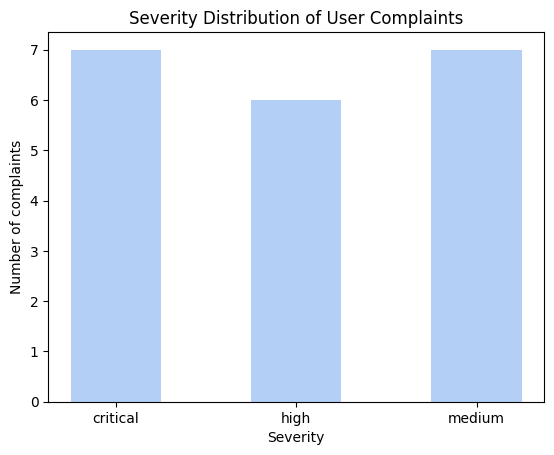

In [87]:
import matplotlib.pyplot as plt

labels = list(severity_counts.keys())
values = list(severity_counts.values())

plt.bar(labels, values, width=0.5, color = '#b4cff6')
plt.xlabel("Severity")
plt.ylabel("Number of complaints")
plt.title("Severity Distribution of User Complaints")
plt.show()

In [88]:


issue_category_counts = Counter(
    ex["user_complaint"]["user_attributes"]["issue_category"]
    for ex in user_complaints_examples
)

print(issue_category_counts)

Counter({'cannot complete task': 6, 'slowdown': 5, 'incorrect data': 5, 'security concern': 3, 'data inconsistency': 1})


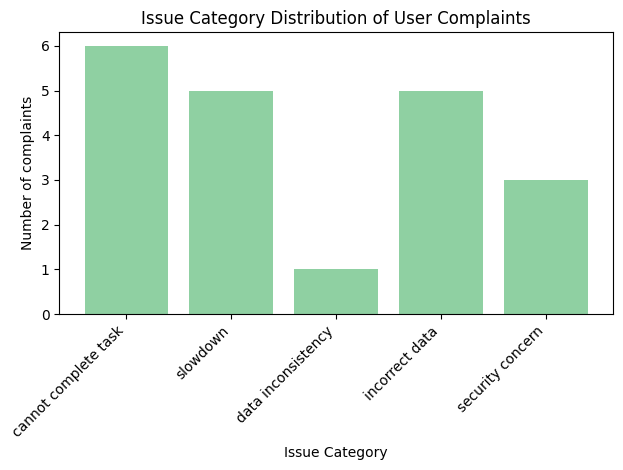

In [89]:
labels = list(issue_category_counts.keys())
values = list(issue_category_counts.values())

plt.bar(labels, values, color ='#8fd0a2')
plt.xlabel("Issue Category")
plt.ylabel("Number of complaints")
plt.title("Issue Category Distribution of User Complaints")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [90]:
user_expertise_counts = Counter(
    ex["user_complaint"]["user_attributes"]["user_experience"]
    for ex in user_complaints_examples
)

print(user_expertise_counts)

Counter({'novice': 9, 'expert': 8, 'experienced': 3})


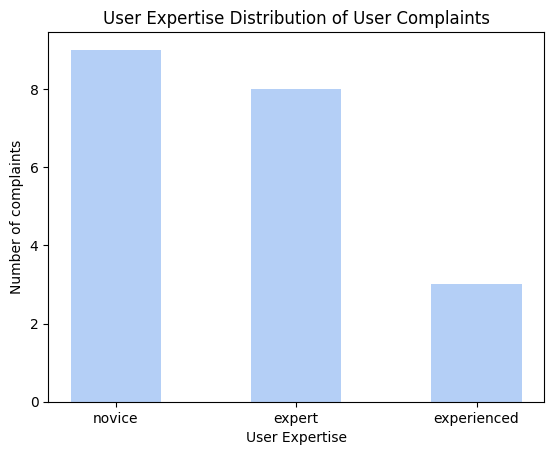

In [91]:
labels = list(user_expertise_counts.keys())
values = list(user_expertise_counts.values())

plt.bar(labels, values, width=0.5, color ='#b4cff6')
plt.xlabel("User Expertise")
plt.ylabel("Number of complaints")
plt.title("User Expertise Distribution of User Complaints")
plt.show()

In [92]:
def classify_component(ticket_text, components):
    component_list = "\n".join(f"- {c}" for c in components)

    prompt = f"""
    You are an expert enterprise support triage system.

    TASK:
    Identify which technical component is most likely responsible for the issue.

    CANDIDATE COMPONENTS:
    {component_list}(

    RULES:
    - Choose exactly ONE component from the list.
    - Output ONLY the component name.
    - No explanations.

    SUPPORT TICKET:
    {ticket_text}
    """

    response = ollama.chat(
        model="llama3.2",
        messages=[{"role": "user", "content": prompt}],
    )

    return response["message"]["content"].strip()

In [93]:






ticket_text="I've been experiencing intermittent slowdowns with the Digital Asset Management System, and it's really hindering our team's ability to collaborate effectively on content creation. The delays in uploading, tagging, and retrieving digital assets are impacting our workflow and causing delays in delivering content on time. This is critical for our timely digital content delivery."


workflow_description ={
      "workflow_name": "Customer Interaction Management in Technology Industry CRM",
      "workflow_description": "This workflow consists of managing customer interactions, data, and relationships within the technology industry. It facilitates the tracking of customer communications, sales, and support activities to enhance customer satisfaction and retention.",
      "workflow_components": [
        "Customer Data Management",
        "Lead and Opportunity Tracking",
        "Sales Pipeline Management",
        "Support Ticketing System",
        "Integration with Marketing Automation"
      ]
    }



print(classify_component(ticket_text, workflow_description['workflow_components']))



Customer Data Management


In [94]:
ticket_text="I am extremely concerned about the software bug in the Assessing Regulatory Requirements task.This issue is critical as it's approving non-compliant activities, which could lead to legal and regulatory violations in the hospitality and tourism industry. This poses a significant risk to our organization's reputation and could result in substantial fines or legal actions. Urgent action is needed to address this issue!"


workflow_description ={
      "workflow_name": "Digital Content Management Workflow in Technology Industry",
      "workflow_description": "This workflow involves the creation, management, and publishing of digital content within the technology industry. It enables seamless collaboration among content creators, editors, and publishers to ensure the timely and accurate delivery of digital content to various platforms and devices.",
      "workflow_components": [
        "Content Creation Interface",
        "Version Control System",
        "Digital Asset Management System",
        "Publishing Pipeline",
        "Content Distribution Platform"
      ]
    }





print(classify_component(ticket_text, workflow_description['workflow_components']))

Content Creation Interface


In [95]:

workflow_description ={
      "workflow_name": "Digital Content Management in Education",
      "workflow_description": "This workflow involves the creation, management, and publishing of digital educational content. It facilitates the seamless organization, update, and delivery of learning materials, ensuring educators have access to up-to-date resources and students have a consistent learning experience.",
      "workflow_components": [
        "Content Creation and Authoring Tools",
        "Digital Asset Management System",
        "Access Control and Permissions Module",
        "Versioning and Change Tracking",
        "Integration with Learning Management Systems"
      ]
    }



ticket_text="I am experiencing a critical issue with the Digital Asset Management System. All the metadata associated with our educational content has been lost, making it impossible for educators to manage and publish materials. This is impacting our ability to effectively deliver essential learning resources to students."

print(classify_component(ticket_text, workflow_description['workflow_components']))

Digital Asset Management System


In [96]:
### Classification for severity

In [97]:
# 1. Install libraries (if running in Colab for the first time)
#!pip install -q transformers datasets evaluate scikit-learn accelerate

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate

# ==========================================
# 1. Data Preparation
# ==========================================

# We assume 'user_complaints_examples' is the list generated by your previous code
if 'user_complaints_examples' not in locals():
    print("Warning: user_complaints_examples not found. Using dummy data for demo.")
    # (Insert dummy data logic here if needed, but for you, this will use your variable)
    user_complaints_examples = []

def preprocess_entry(entry):
    # Construct the full prompt context for the AI to analyze
    text_input = f"""
    Industry: {entry['industry']['industry']}
    System: {entry['system']['system']}
    Workflow: {entry['workflow']['workflow_name']}
    Malfunction: {entry['malfunction']['malfunction_description']}
    User Complaint: {entry['user_complaint']['user_complaint']}
    """

    # Target: We use 'severity' as the difficulty label.
    # If your generator creates a specific 'difficulty' field, change this line.
    label = entry['malfunction']['severity']

    return {"text": text_input.strip(), "label": label}

# Flatten the list of JSONs into a Pandas DataFrame
processed_data = [preprocess_entry(x) for x in user_complaints_examples]
df = pd.DataFrame(processed_data)

# Encode text labels into integers (0, 1 ,2)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
label_map = {index: label for index, label in enumerate(le.classes_)}
print(f"Classes found: {label_map}")

# ==========================================
# 2. Splitting (75% / 15% / 10%) - FIXED
# ==========================================

# We remove 'stratify' because your dataset is too small (only 10 items).
# For real training later, generate 100+ items and add 'stratify=df['label']' back.

# 1. Split Train (75%) vs Temp (25%)
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)

# 2. Split Temp into Val (15%) and Test (10%)
# 10% is 40% of the remaining 25% (0.25 * 0.40 = 0.10)
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42)

print(f"Split sizes -> Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

# Convert to Hugging Face format
hf_data = DatasetDict({
    "train": Dataset.from_pandas(train_df),
    "validation": Dataset.from_pandas(val_df),
    "test": Dataset.from_pandas(test_df)
})

# ==========================================
# 3. Tokenization
# ==========================================

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = hf_data.map(tokenize_function, batched=True)

# ==========================================
# 4. Training Configuration
# ==========================================

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_map)
)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",            # Evaluate on Validation set every epoch
    save_strategy="epoch",            # Save model checkpoint every epoch
    logging_steps=1,
    load_best_model_at_end=True,      # Load the best model at the end
    metric_for_best_model="accuracy",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    report_to="none"
)

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"], # Using the 15% split here
    compute_metrics=compute_metrics,
)

# ==========================================
# 5. Execute
# ==========================================

print("Starting Training...")
trainer.train()

print("\nEvaluating on pure Test Set (The 15% split)...")
test_results = trainer.evaluate(tokenized_datasets["test"])
print(f"Test Set Accuracy: {test_results['eval_accuracy']:.2f}")

# Save the final model so you can reload it later
trainer.save_model("./final_difficulty_classifier")
print("Model saved to ./final_difficulty_classifier")

Classes found: {0: 'critical', 1: 'high', 2: 'medium'}
Split sizes -> Train: 12, Val: 4, Test: 4


Map:   0%|          | 0/12 [00:00<?, ? examples/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Training...


Epoch,Training Loss,Validation Loss,Accuracy
1,1.230900,1.095287,0.250000
2,1.110100,1.103650,0.250000
3,1.075900,1.107666,0.250000



Evaluating on pure Test Set (The 10% split)...


Test Set Accuracy: 0.50
Model saved to ./final_difficulty_classifier


In [98]:
test_df.head()

,text,label
17,Industry: Healthcare\n System: ERP System\n...,2
5,Industry: Healthcare\n System: CRM\n Wor...,0
0,Industry: Information Technology\n System: ...,0
3,Industry: Agriculture\n System: PLM\n Wo...,1
